In [149]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

# examine the dataset

In [4]:
df = pd.read_csv('data/training.csv')
df.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [137]:
df['class'].unique()

array(['car ', 'concrete ', 'tree ', 'building ', 'asphalt ', 'grass ',
       'shadow ', 'soil ', 'pool '], dtype=object)

Totally, we have 9 classes

In [136]:
df.shape

(168, 148)

For each class, there are 148 features.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 194.4+ KB


In [24]:
df.isnull().sum().sum()

0

No missing value

In [103]:
type(df['class'].unique())

numpy.ndarray

<AxesSubplot:>

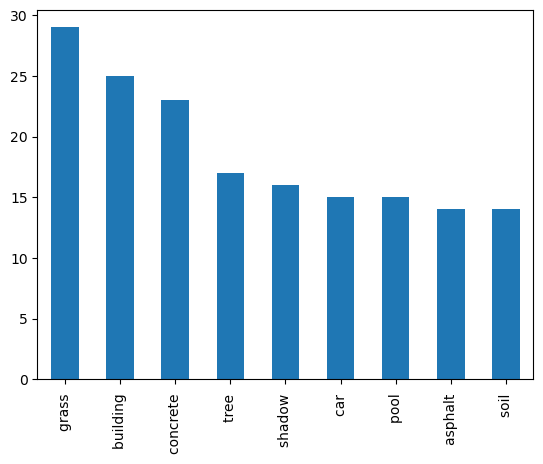

In [30]:
df['class'].value_counts().plot.bar()

For each category, there are only 15 to 30 samples, which means features is more than the observations.

# plot the data

In [77]:
pca = PCA()
data_pca = pca.fit_transform(df.iloc[:, 1:], df['class'])
data_pca = pd.DataFrame(data_pca)

In [75]:
variance_table_pca = pd.DataFrame({'variance': pca.explained_variance_ratio_,
              'cumulative variance': pca.explained_variance_ratio_.cumsum()}).T
variance_table_pca

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
variance,0.829064,0.066809,0.030887,0.022003,0.016059,0.009044,0.008212,0.005737,0.004473,0.002219,...,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33
cumulative variance,0.829064,0.895873,0.926760,0.948763,0.964822,0.973866,0.982079,0.987815,0.992289,0.994508,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [139]:
plot_pca = pd.concat([df.iloc[:,0], data_pca.iloc[:,:3]], axis=1)
plot_pca

,class,0,1,2
0,car,-9384.337536,439.951506,-2907.512889
1,concrete,4668.577863,-886.067393,-442.514673
2,concrete,102.184955,-2317.924370,-398.668910
3,concrete,9694.995775,-1945.714129,-1374.772477
4,concrete,18126.640584,3237.253970,1936.137565
...,...,...,...,...
163,car,-9231.924543,527.880856,-1944.554404
164,soil,-1827.451573,2114.447897,-557.576197
165,grass,685.298654,211.802160,1228.270984
166,grass,-6950.020256,-233.235668,719.509592


Text(0.5, 1.0, '2D data plot based on first two PCA component')

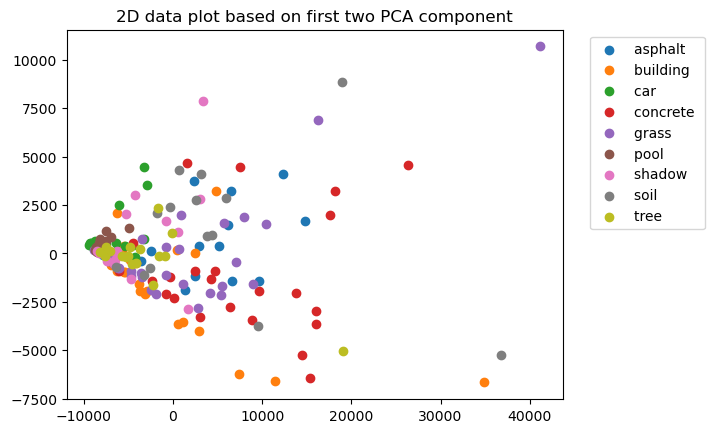

In [141]:
groups = plot_pca.groupby('class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.iloc[:,1], group.iloc[:,2], label=name)
ax.legend(loc='upper right', bbox_to_anchor=(1.3,1))
ax.set_title('2D data plot based on first two PCA component')

Text(0.5, 0.92, '3D data plot based on first two PCA component')

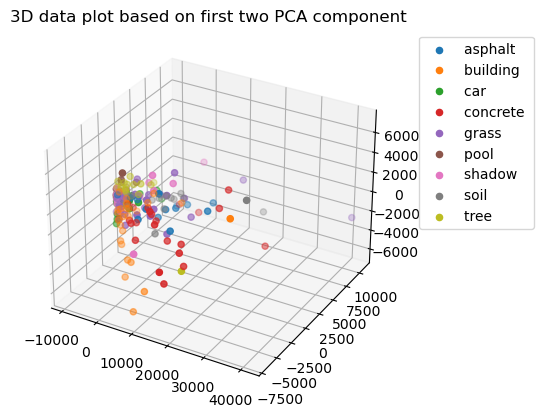

In [146]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for name, group in groups:
    ax.scatter(group.iloc[:, 1], group.iloc[:, 2], group.iloc[:, 3], label=name)
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_title('3D data plot based on first two PCA component')

The plot doesn't look good, most of the points crowd together. This may cause be the magnitudes of some features.

In [151]:
df.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2.008512,565.869048,1.132976,165.569821,2.077679,2.229881,161.577083,163.672440,171.459226,10.131369,...,23.769881,3.098274,0.796488,0.665000,7.795536,1.594405,0.615357,0.014583,983.309524,1275.292917
std,0.634807,679.852886,0.489150,61.883993,0.699600,0.703572,63.407201,71.306748,67.973969,5.179409,...,12.836522,6.101883,0.103930,0.179086,0.670491,0.460627,0.239900,0.153677,880.013745,603.658611
min,1.000000,10.000000,0.020000,37.670000,1.000000,1.060000,30.680000,32.210000,40.120000,4.330000,...,4.020000,1.000000,0.330000,0.240000,6.290000,0.230000,0.070000,-0.360000,56.000000,336.730000
25%,1.537500,178.000000,0.787500,133.977500,1.547500,1.700000,91.040000,101.187500,120.165000,6.770000,...,13.965000,1.395000,0.757500,0.560000,7.357500,1.325000,0.460000,-0.080000,320.000000,817.405000
50%,1.920000,315.000000,1.085000,164.485000,1.940000,2.130000,187.560000,160.615000,178.345000,8.010000,...,21.135000,1.740000,0.810000,0.690000,7.790000,1.660000,0.620000,-0.040000,776.000000,1187.025000
75%,2.375000,667.000000,1.410000,221.895000,2.460000,2.680000,210.940000,234.815000,236.002500,11.500000,...,29.957500,2.285000,0.870000,0.810000,8.260000,1.945000,0.810000,0.120000,1412.500000,1588.427500
max,4.190000,3659.000000,2.890000,244.740000,4.700000,4.300000,246.350000,253.080000,253.320000,36.400000,...,60.020000,51.540000,0.950000,0.980000,9.340000,2.340000,1.000000,0.350000,6232.000000,3806.360000


try standardize dataset

In [154]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df.iloc[:, 1:])

In [155]:
pca = PCA()
data_standardized_pca = pca.fit_transform(data_standardized)

In [156]:
pd.DataFrame({'variance': pca.explained_variance_ratio_,
              'cumulative variance': pca.explained_variance_ratio_.cumsum()}).T

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
variance,0.228788,0.199952,0.121619,0.079810,0.055992,0.044674,0.036981,0.028317,0.023104,0.022065,...,9.859406e-34,9.859406e-34,9.859406e-34,9.859406e-34,9.859406e-34,9.859406e-34,9.859406e-34,9.859406e-34,9.859406e-34,9.859406e-34
cumulative variance,0.228788,0.428740,0.550359,0.630169,0.686161,0.730835,0.767816,0.796133,0.819236,0.841302,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


It needs at least 15 components to cover 90% of the variance.

In [160]:
df_standardized_pca = pd.concat([df['class'], pd.DataFrame(data_standardized_pca)], axis=1)
groups = df_standardized_pca.groupby(by='class')

Text(0.5, 1.0, '2D standard data plot based on first three PCA component')

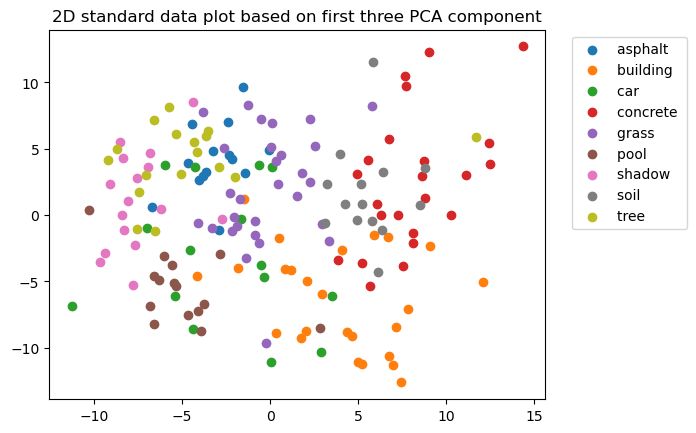

In [163]:
fig = plt.figure()
ax = fig.subplots()
for name, group in groups:
    ax.scatter(group.iloc[:, 1], group.iloc[:, 2], label=name)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
ax.set_title('2D standard data plot based on first three PCA component')

Text(0.5, 0.92, '3D standard data plot based on first three PCA component')

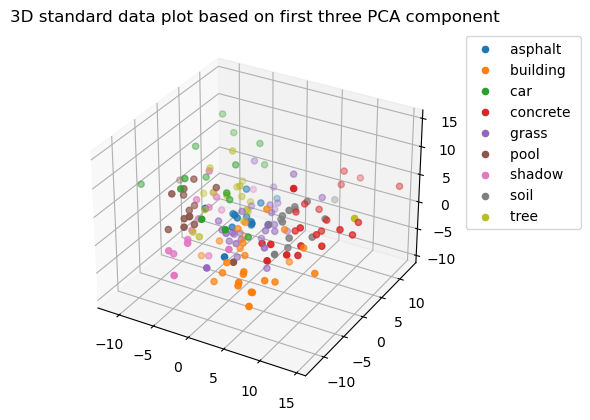

In [164]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for name, group in groups:
    ax.scatter(group.iloc[:, 1], group.iloc[:, 2], group.iloc[:, 3], label=name)
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_title('3D standard data plot based on first three PCA component')